<a href="https://colab.research.google.com/github/MahaleVivek/pytorch_a_deep_learning_journey/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluate a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluate a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks

import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything...in machine learning

* Excel spreadsheets
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to a learn pattern in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula

We'll use linear regression formula to make a straight line with known **parameters**

In [13]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias    # y = max + c

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test data set with our data

In [15]:
# Create a train and test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [16]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [17]:
## how might we better vizualize our data?

#This is where the data explorer's motto comes in!

In [24]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot the test data in green
  plt.scatter(test_data, test_data, c="g", s=4, label="Test data")

  #is predictions?
  if predictions is not None:
    #plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s="r", labels="Predictions")

  #show the legends
  plt.legend(prop={"size":14})

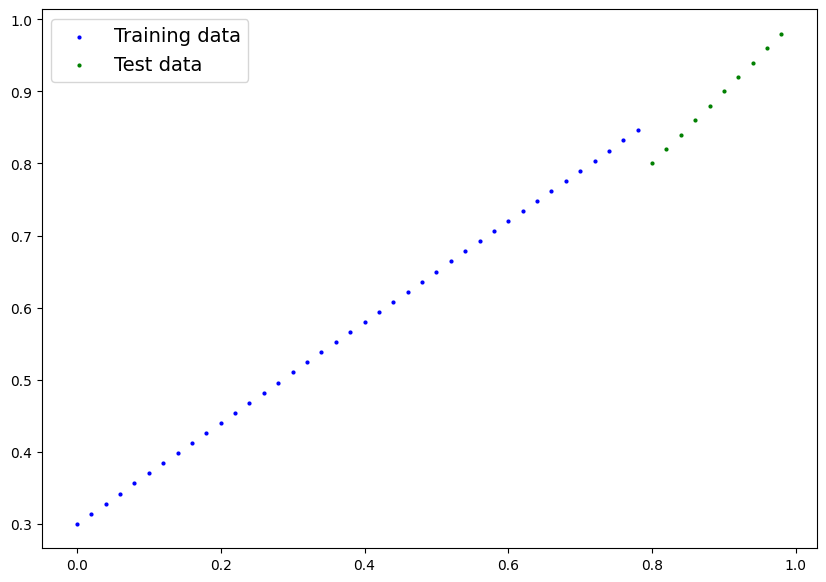

In [25]:
plot_predictions()

## 2. Building model

First PyTorch model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)


How does it do so?
 Through two main algorithms:
 1. Gradient descent
 2. Backpropagation

In [26]:
from torch import nn

# create a linear regression model class
class LinearRegression(nn.Module):# <- almost everything in PyTorch nherits from nn.Module
  def __init__(self):
    super().__init__()

    #initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias and try to adjust the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradiet descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    #Forward() to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #<-"x" is input data
      return self.weights * x + self.bias # this is a linear regression formula


### PyTorch model building essentials

* `torch.nn`: contains all of the buidling blocks for computational graphs (a neural network can be considered a computeational graph)
* `torch.nn.Parameter`: what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module`: the based class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim`: this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()`: this defined what happens in the forward computation